## Predicción de fútbol con datos

EL objetivo de este modelo de machin lerning es predecir entre dos equipos de futbol si el local gana, pierde o empata, en base a los atributos de los jugadores titulares de ambos equipos.

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#visualización
import matplotlib.pyplot as plt
import seaborn as sns

#preprocesado de datos
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier


#pipelines_gridsearch_crossvalidations
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
# Load libraries

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.impute  import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
import lightgbm as lgbm
from catboost import CatBoostClassifier as CTC

In [2]:
liga_18_19 = pd.read_csv('liga_18_19_besoccer.csv')
liga_19_20 = pd.read_csv('liga_19_20_besoccer.csv')
liga_20_21 = pd.read_csv('liga_20_21_besoccer.csv')
liga_21_22 = pd.read_csv('liga_21_22_besoccer.csv')

In [3]:
df = pd.concat([liga_18_19,liga_19_20,liga_20_21,liga_21_22],axis=0,ignore_index=True)

In [81]:
#df = pd.read_csv('liga_21_22_besoccer.csv')

In [82]:
df.head()

,Unnamed: 0,fecha,portero_l,defensas_l,centrocampistas_l,delanteros_l,alineacion_l,local,Resultado_l,gol_l,...,Resultado_v,visitante,alineacion_v,portero_v,defensas_v,centrocampistas_v,delanteros_v,victorias_l,empates,victorias_v
0,0,2018-08-17,73.00,49.58,66.11,71.67,4-2-3-1,GIRONA,E,0,...,E,REAL VALLADOLID,4-5-1,78.17,63.22,65.92,68.00,5,2,8
1,1,2018-08-17,78.00,65.75,70.39,64.00,3-6-1,REAL BETIS,P,0,...,G,LEVANTE,4-2-3-1,71.67,63.08,69.83,69.78,20,9,11
2,2,2018-08-18,72.02,60.58,66.56,69.42,4-2-3-1,CELTA,E,1,...,E,ESPANYOL,4-3-3,72.67,63.86,69.83,67.56,43,29,57
3,3,2018-08-18,79.67,67.56,67.00,73.33,4-4-2,VILLARREAL,P,1,...,G,R. SOCIEDAD,4-3-3,76.83,66.33,70.83,69.00,15,14,9
4,4,2018-08-18,86.33,69.39,68.78,77.06,4-3-3,BARCELONA,G,3,...,P,DEPORTIVO ALAVES,4-5-1,78.50,58.28,69.00,69.78,25,5,7



## Target
Resultado_l: resulatdo del equipo local
- G = gana
- E = empata
- P = pierde

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1520 non-null   int64  
 1   fecha              1520 non-null   object 
 2   portero_l          1520 non-null   float64
 3   defensas_l         1520 non-null   float64
 4   centrocampistas_l  1520 non-null   float64
 5   delanteros_l       1520 non-null   float64
 6   alineacion_l       1520 non-null   object 
 7   local              1520 non-null   object 
 8   Resultado_l        1520 non-null   object 
 9   gol_l              1520 non-null   int64  
 10  gol_v              1520 non-null   int64  
 11  Resultado_v        1520 non-null   object 
 12  visitante          1520 non-null   object 
 13  alineacion_v       1520 non-null   object 
 14  portero_v          1520 non-null   float64
 15  defensas_v         1520 non-null   float64
 16  centrocampistas_v  1520 

## 1. Identificación del Problema de ML (Clasificacion/Regresión)
Este es un problema de clasificación para estimar el resultado del equipo local, la target es una variable categorica.

## 2.Divido en Train Test

In [84]:
X = df.copy()
y = X.pop('Resultado_l')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## 3.Target

comprobamos si nuestra variable objetivo es balanceada

In [86]:
y.describe()

count     1520
unique       3
top          G
freq       681
Name: Resultado_l, dtype: object

In [87]:
y.value_counts()

G    681
E    431
P    408
Name: Resultado_l, dtype: int64

In [88]:
porc = y.value_counts()/len(y)
print(porc)

G    0.448026
E    0.283553
P    0.268421
Name: Resultado_l, dtype: float64


podemos concluir que la variable es balanceada ya que no hay una gran difererncia entre sus valores.

## 4.Comprension de variables


In [89]:
X.describe()

,Unnamed: 0,portero_l,defensas_l,centrocampistas_l,delanteros_l,gol_l,gol_v,portero_v,defensas_v,centrocampistas_v,delanteros_v,victorias_l,empates,victorias_v
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,189.500000,76.105546,63.970059,67.424921,67.755046,1.436842,1.075000,76.032461,63.782158,67.392066,67.913428,26.802632,15.712500,26.832895
std,109.732273,4.760385,4.560581,5.943303,5.975958,1.198511,1.079295,4.770724,4.496106,5.305014,5.956183,25.946428,13.488184,25.971062
min,0.000000,65.330000,49.580000,15.830000,19.330000,0.000000,0.000000,65.330000,45.220000,15.830000,19.330000,0.000000,0.000000,0.000000
25%,94.750000,72.500000,60.830000,64.830000,64.990000,1.000000,0.000000,72.080000,60.800000,64.830000,65.102500,9.000000,6.000000,9.000000
50%,189.500000,76.830000,63.500000,68.000000,68.390000,1.000000,1.000000,76.830000,63.270000,67.830000,68.335000,17.000000,11.000000,17.000000
75%,284.250000,78.500000,67.080000,70.787500,71.670000,2.000000,2.000000,78.500000,66.775000,70.720000,71.670000,36.000000,23.000000,36.000000
max,379.000000,86.330000,78.670000,77.500000,85.830000,8.000000,6.000000,86.330000,78.170000,76.330000,81.500000,124.000000,59.000000,125.000000


In [90]:
cat=X.select_dtypes(include=["object"])
num=X.select_dtypes(include=["int64","float64"])

### EXPLORATORIO INICIAL: CATEGORICAS

In [91]:
cat.describe()

,fecha,alineacion_l,local,Resultado_v,visitante,alineacion_v
count,1520,1520,1520,1520,1520,1520
unique,383,10,25,3,25,10
top,2020-07-19,4-4-2,DEPORTIVO ALAVES,P,ATHLETIC,4-4-2
freq,20,610,76,681,76,535


### EXPLORATORIO INICIAL NUMERICAS

In [92]:
num.describe()

,Unnamed: 0,portero_l,defensas_l,centrocampistas_l,delanteros_l,gol_l,gol_v,portero_v,defensas_v,centrocampistas_v,delanteros_v,victorias_l,empates,victorias_v
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,189.500000,76.105546,63.970059,67.424921,67.755046,1.436842,1.075000,76.032461,63.782158,67.392066,67.913428,26.802632,15.712500,26.832895
std,109.732273,4.760385,4.560581,5.943303,5.975958,1.198511,1.079295,4.770724,4.496106,5.305014,5.956183,25.946428,13.488184,25.971062
min,0.000000,65.330000,49.580000,15.830000,19.330000,0.000000,0.000000,65.330000,45.220000,15.830000,19.330000,0.000000,0.000000,0.000000
25%,94.750000,72.500000,60.830000,64.830000,64.990000,1.000000,0.000000,72.080000,60.800000,64.830000,65.102500,9.000000,6.000000,9.000000
50%,189.500000,76.830000,63.500000,68.000000,68.390000,1.000000,1.000000,76.830000,63.270000,67.830000,68.335000,17.000000,11.000000,17.000000
75%,284.250000,78.500000,67.080000,70.787500,71.670000,2.000000,2.000000,78.500000,66.775000,70.720000,71.670000,36.000000,23.000000,36.000000
max,379.000000,86.330000,78.670000,77.500000,85.830000,8.000000,6.000000,86.330000,78.170000,76.330000,81.500000,124.000000,59.000000,125.000000


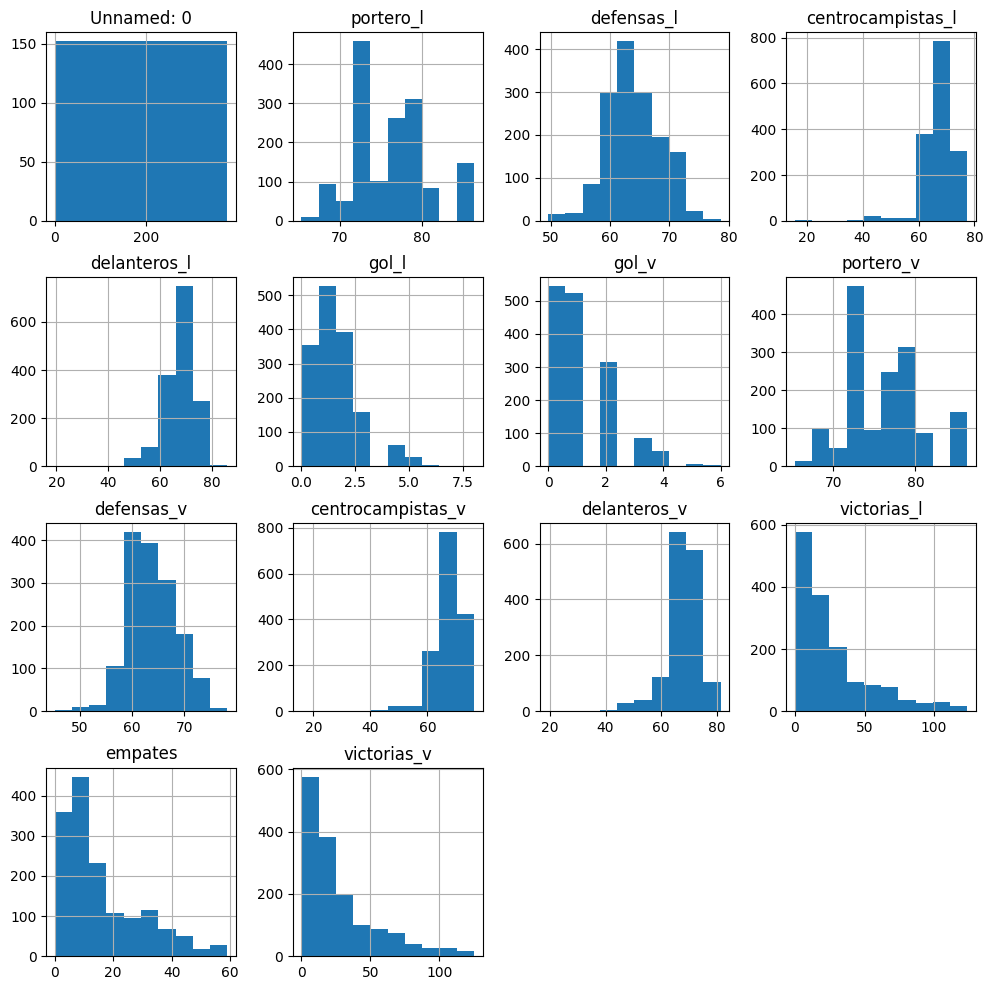

In [93]:
num.hist(figsize=(12,12));

## 5.Feature Reduction Preliminar

Elimino las columnas que no necesito:
  
- local,visitante y fechas son todos valores diferentes  
- gol_l y gol_v porque son datos que no conozco antes de un partido  
- Unnamed: 0 es simplemente un indice  
- Resultado_v es lel inverso de nuestra target

In [94]:
X_train = X_train.drop(['Unnamed: 0','fecha','local','gol_l','visitante','gol_v','Resultado_v'],axis=1)
X_test =  X_test.drop(['Unnamed: 0','fecha','local','gol_l','visitante','gol_v','Resultado_v'],axis=1)

## 6. EDA: Análisis univariante

In [95]:
cat=X.select_dtypes(include=["object"])
num=X.select_dtypes(include=["int64","float64"])

In [96]:
#VARIABLES NUMERICAS, DIVIDIMOS POR NORMALES Y NO NORMALES
num_norm=pd.DataFrame()
num_no_norm=pd.DataFrame()
for i in num:
    if -2<num[i].skew()<2  and -3<num[i].kurt()<3:
        num_norm[i]=num[i]
    else:
        num_no_norm[i]=num[i]
    

print(f"las normales son: {num_norm.columns}")
print(f"las no normales son: {num_no_norm.columns}")

las normales son: Index(['Unnamed: 0', 'portero_l', 'defensas_l', 'gol_l', 'gol_v', 'portero_v',
       'defensas_v', 'victorias_l', 'empates', 'victorias_v'],
      dtype='object')
las no normales son: Index(['centrocampistas_l', 'delanteros_l', 'centrocampistas_v',
       'delanteros_v'],
      dtype='object')


'delanteros_l' y  'delanteros_v' no son normales, podemos usar transformaciones como BOX-COX o YEO-JOHSON para conseguir normalidad y ver si el modelo mejora.

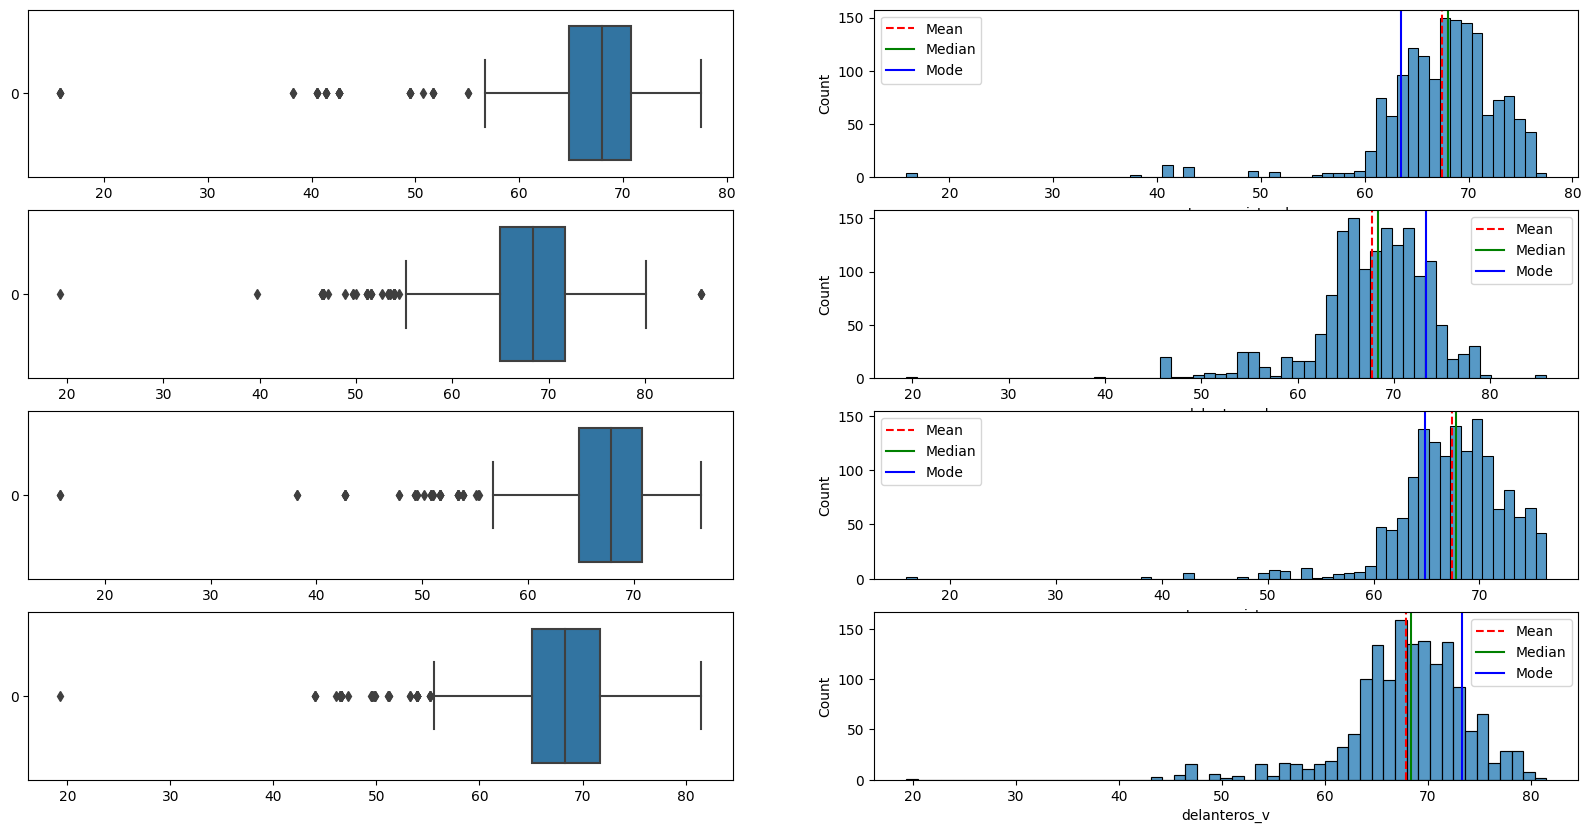

In [97]:

a=0
fig, axe = plt.subplots(4,2,figsize = (20,10));
for i in num_no_norm:
    sns.boxplot(num_no_norm[i],ax=axe[a][0],orient="hor");
    sns.histplot(num_no_norm[i],ax=axe[a][1]);
    axe[a][1].axvline(num_no_norm[i].mean(), color='r', linestyle='--', label="Mean");
    axe[a][1].axvline(num_no_norm[i].median(), color='g', linestyle='-', label="Median");
    axe[a][1].axvline(num_no_norm[i].mode().values[0], color='b', linestyle='-', label="Mode");
    axe[a][1].legend();
    a=a+1

In [98]:
X_train.head(10)

,portero_l,defensas_l,centrocampistas_l,delanteros_l,alineacion_l,alineacion_v,portero_v,defensas_v,centrocampistas_v,delanteros_v,victorias_l,empates,victorias_v
1423,72.50,60.61,62.89,66.00,4-5-1,5-3-2,68.33,63.02,67.22,70.83,16,4,13
1083,72.83,60.77,65.33,65.01,4-4-2,3-6-1,68.50,59.94,67.17,66.08,4,4,5
1435,78.50,66.67,60.33,66.00,4-2-3-1,4-5-1,72.50,60.61,62.89,66.00,37,13,25
111,78.17,63.22,62.08,69.83,4-2-3-1,4-2-3-1,68.83,66.57,50.78,67.83,5,3,3
1295,70.50,57.92,67.94,67.00,4-2-3-1,4-5-1,72.67,64.50,68.28,69.56,11,13,17
798,78.17,62.50,61.50,67.75,4-4-2,4-4-2,72.67,61.38,68.50,71.00,27,30,39
1142,72.50,59.30,64.73,63.68,4-2-3-1,4-4-2,79.00,61.42,70.08,68.08,13,13,16
1128,77.00,65.00,64.28,59.25,4-4-2,4-4-2,85.83,62.25,75.56,75.17,4,8,22
1284,76.83,63.83,67.72,68.67,4-2-3-1,4-3-3,86.33,63.17,68.06,70.00,9,10,29
1381,71.83,62.46,66.28,64.72,4-2-3-1,4-4-2,79.67,66.83,68.92,68.34,3,7,9


## 7. Análisis bivariante

In [99]:
#sns.pairplot(df)

### PREPROCESSING 

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encode = le.transform(y_test)

### Numericas y categoricas

In [101]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)


In [102]:
from sklearn.compose import ColumnTransformer


num_prepro=Pipeline(steps=[("scaler",StandardScaler())])
cat_prepro=Pipeline(steps=[("onehot",OneHotEncoder(handle_unknown="ignore"))])

col_trans = ColumnTransformer([
    ('cat_prepro', cat_prepro, categorical_columns),
    ('num_prepro', num_prepro, numerical_columns)])

## Entrenando el modelo

## Modelos sin GS - Express

In [103]:
log_Reg_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", LogisticRegression())
])

Dec_Tre_cl_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", DecisionTreeClassifier())
])

KNe_cl_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", KNeighborsClassifier())
])

SVC_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", SVC())
])

rand_forest_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", RandomForestClassifier())
])

xgb_cl_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("xgb_cl", xgboost.XGBRFClassifier())
])

lgbm_clas_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("lgbm_clas", lgbm.LGBMClassifier() )
])

ctc_clas_ex = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("ctc_clas", CTC(verbose=0) )
])

modelos = {
        "log_Reg_ex": log_Reg_ex,
        "SVC_ex": SVC_ex,
        "Dec_Tre_cl_ex": Dec_Tre_cl_ex,
        "KNe_cl_ex": KNe_cl_ex,
        "rand_forest_ex": rand_forest_ex,
        "xgb_cl_ex": xgb_cl_ex,
        "lgbm_clas_ex": lgbm_clas_ex,
        "ctc_clas_ex": ctc_clas_ex
        }

In [104]:
scores_ex=pd.DataFrame(columns=["validation_metric_mean","validation_metric_std","training_metric_mean","training_metric_std","accuracy_X_test"])

In [ ]:
for nombre, modelo in modelos.items():

    modelo_ex=modelo.fit(X_train, y_train_encoded)

    y_predict_ex = modelo_ex.predict(X_test)
    cv_ex=pd.DataFrame(cross_validate(modelo_ex, X_train, y_train_encoded, cv=5,return_train_score=True,scoring='accuracy'))
    scores_ex.loc[f"{nombre}"] = [ cv_ex["test_score"].mean(), cv_ex["test_score"].std(),cv_ex["train_score"].mean(), cv_ex["train_score"].std(),accuracy_score(y_predict_ex,y_test_encode)]

In [77]:
scores_ex

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std,accuracy_X_test
log_Reg_ex,0.514002,0.018409,0.541530,0.007628,0.483553
SVC_ex,0.524658,0.022415,0.659540,0.005488,0.500000
Dec_Tre_cl_ex,0.583107,0.037123,1.000000,0.000000,0.605263
KNe_cl_ex,0.472043,0.021553,0.662212,0.009644,0.453947
rand_forest_ex,0.622553,0.028209,1.000000,0.000000,0.667763
xgb_cl_ex,0.568262,0.018450,0.806333,0.016318,0.569079
lgbm_clas_ex,0.617604,0.009331,1.000000,0.000000,0.641447
ctc_clas_ex,0.630763,0.015016,1.000000,0.000000,0.641447


### Elijo RandomForestClassifier como modelo ya que obtuvo el mejor resultado de acuraccy en test

Visualizacion del rango para el max_depth

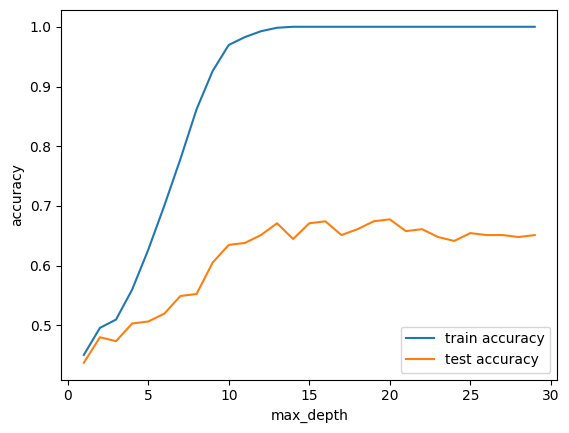

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_accs = []
test_accs = []

for depth in range(1,30):
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    pipe = Pipeline(steps=[('preprocessor', col_trans), ('classifier', rf)])
    pipe.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.plot(range(1,30), train_accs, label='train accuracy')
plt.plot(range(1,30), test_accs, label='test accuracy')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

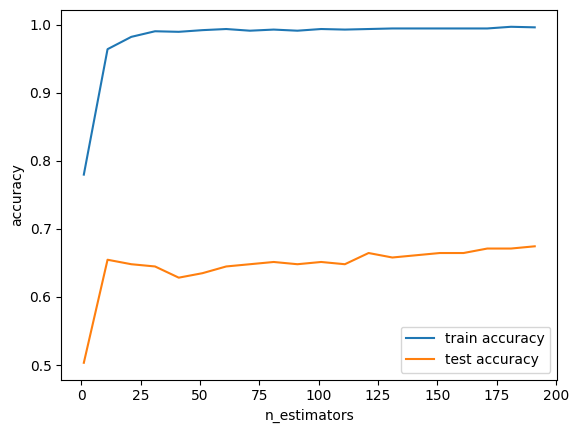

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_accs = []
test_accs = []

for estimators in range(1,200,10):
    rf = RandomForestClassifier(n_estimators=estimators, max_depth=12, random_state=42)
    pipe = Pipeline(steps=[('preprocessor', col_trans), ('classifier', rf)])
    pipe.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.plot(range(1,200,10), train_accs, label='train accuracy')
plt.plot(range(1,200,10), test_accs, label='test accuracy')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

#### primer modelo

In [109]:

rand_forest = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", RandomForestClassifier())
])

rand_forest_param = {
    "prepo__num_prepro__scaler": [None,StandardScaler(),MinMaxScaler()],
    "randfor__max_depth": range(8,13),
    "randfor__n_estimators": range(1,100,5)
}

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 0,
                         n_jobs = -1)

In [110]:
gs_rand_forest.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prepo',
                                        ColumnTransformer(transformers=[('cat_prepro',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['alineacion_l',
                                                                          'alineacion_v']),
                                                                        ('num_prepro',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['portero_l',
                                                                          'defensas_l',
                                                                          'centrocampistas_l',
                                                                          'delanteros_l',
                                                                          'portero_v',
                                                                          'defensas_v',
                                                                          'centrocampistas_v',
                                                                          'delanteros_v',
                                                                          'victorias_l',
                                                                          'empates',
                                                                          'victorias_v'])])),
                                       ('randfor', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'prepo__num_prepro__scaler': [None, StandardScaler(),
                                                       MinMaxScaler()],
                         'randfor__max_depth': range(8, 13),
                         'randfor__n_estimators': range(1, 100, 5)},
             scoring='accuracy')

In [111]:
gs_rand_forest = gs_rand_forest.best_estimator_

In [112]:
y_predict = gs_rand_forest.predict(X_test)

cv=pd.DataFrame(cross_validate(gs_rand_forest, X_train, y_train, cv=5,return_train_score=True,scoring='accuracy'))
scores=pd.DataFrame(columns=["validation_metric_mean","validation_metric_std","training_metric_mean","training_metric_std","accuracy_X_test"])
scores.loc["gs_rand_forest"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std(),accuracy_score(y_predict,y_test) ]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std,accuracy_X_test
gs_rand_forest,0.622536,0.020576,0.997739,0.001977,0.638158


In [179]:
import pickle

filename = 'random_forest.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(gs_rand_forest, archivo_salida)

### segundo modelo

In [113]:
rand_forest2 = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", RandomForestClassifier())
])

rand_forest_param2 = {
    "prepo__num_prepro__scaler": [None,StandardScaler(),MinMaxScaler()],
    "randfor__n_estimators": range(1,200)
}

gs_rand_forest2 = GridSearchCV(rand_forest2,
                         rand_forest_param2,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 0,
                         n_jobs = -1)

In [114]:
gs_rand_forest2.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prepo',
                                        ColumnTransformer(transformers=[('cat_prepro',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['alineacion_l',
                                                                          'alineacion_v']),
                                                                        ('num_prepro',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['portero_l',
                                                                          'defensas_l',
                                                                          'centrocampistas_l',
                                                                          'delanteros_l',
                                                                          'portero_v',
                                                                          'defensas_v',
                                                                          'centrocampistas_v',
                                                                          'delanteros_v',
                                                                          'victorias_l',
                                                                          'empates',
                                                                          'victorias_v'])])),
                                       ('randfor', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'prepo__num_prepro__scaler': [None, StandardScaler(),
                                                       MinMaxScaler()],
                         'randfor__n_estimators': range(1, 200)},
             scoring='accuracy')

In [115]:
gs_rand_forest2 = gs_rand_forest2.best_estimator_

In [116]:
y_predict2 = gs_rand_forest2.predict(X_test)

cv=pd.DataFrame(cross_validate(gs_rand_forest2, X_train, y_train, cv=5,return_train_score=True,scoring='accuracy'))

scores.loc["gs_rand_forest2"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std(),accuracy_score(y_predict2,y_test) ]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std,accuracy_X_test
gs_rand_forest,0.622536,0.020576,0.997739,0.001977,0.638158
gs_rand_forest2,0.630776,0.028514,1.000000,0.000000,0.661184


In [180]:
import pickle

filename = 'random_forest2.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(gs_rand_forest2, archivo_salida)

### tercer modelo

In [126]:

rand_forest3 = Pipeline(steps = [ 
    ("prepo", col_trans),
    ("randfor", RandomForestClassifier())
])

rand_forest_param3 = {
    "prepo__num_prepro__scaler": [None],
    "randfor__max_depth": range(13,20),
    "randfor__n_estimators": range(200,500,20)
}

gs_rand_forest3 = GridSearchCV(rand_forest3,
                         rand_forest_param3,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 0,
                         n_jobs = -1)

In [127]:
gs_rand_forest3.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prepo',
                                        ColumnTransformer(transformers=[('cat_prepro',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['alineacion_l',
                                                                          'alineacion_v']),
                                                                        ('num_prepro',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['portero_l',
                                                                          'defensas_l',
                                                                          'centrocampistas_l',
                                                                          'delanteros_l',
                                                                          'portero_v',
                                                                          'defensas_v',
                                                                          'centrocampistas_v',
                                                                          'delanteros_v',
                                                                          'victorias_l',
                                                                          'empates',
                                                                          'victorias_v'])])),
                                       ('randfor', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'prepo__num_prepro__scaler': [None],
                         'randfor__max_depth': range(13, 20),
                         'randfor__n_estimators': range(200, 500, 20)},
             scoring='accuracy')

In [128]:
gs_rand_forest3 = gs_rand_forest3.best_estimator_

In [189]:
y_predict3 = gs_rand_forest3.predict(X_test)

cv=pd.DataFrame(cross_validate(gs_rand_forest3, X_train, y_train, cv=5,return_train_score=True,scoring='accuracy'))

scores.loc["gs_rand_forest3"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std(),accuracy_score(y_predict3,y_test) ]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std,accuracy_X_test
gs_rand_forest,0.622536,0.020576,0.997739,0.001977,0.638158
gs_rand_forest2,0.630776,0.028514,1.000000,0.000000,0.661184
gs_rand_forest3,0.627471,0.019977,1.000000,0.000000,0.654605


In [181]:
import pickle

filename = 'random_forest3.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(gs_rand_forest3, archivo_salida)

### De los tres modelo de RandomForest elijo el segundo ya que logró subir un poco el resultado de accuraccy

optengo los parametro y reentreno el modelo para poder visualizar las features importances

In [130]:
gs_rand_forest3.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('prepo',
                 ColumnTransformer(transformers=[('cat_prepro',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['alineacion_l',
                                                   'alineacion_v']),
                                                 ('num_prepro',
                                                  Pipeline(steps=[('scaler',
                                                                   None)]),
                                                  ['portero_l', 'defensas_l',
                                                   'centrocampistas_l',
                                                   'delanteros_l', 'portero_v',
                                                   'defensas_v',
                                      

## Creo mi modelo completo con los datos del GridSearch

### Modelo final 1 con las variables de alineacion

In [42]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector1 = selector(dtype_exclude=object)
categorical_columns_selector1 = selector(dtype_include=object)

numerical_columns1 = numerical_columns_selector(X_train)
categorical_columns1 = categorical_columns_selector(X_train)

In [131]:
from sklearn.compose import ColumnTransformer


num_prepro1=Pipeline(steps=[("scaler1",None)])
cat_prepro1=Pipeline(steps=[("onehot1",OneHotEncoder(handle_unknown="ignore"))])

col_trans_final1 = ColumnTransformer([
    ('cat_prepro1', cat_prepro1, categorical_columns1),
    ('num_prepro1', num_prepro1, numerical_columns1)])

In [132]:
rand_forest_final1 = Pipeline(steps = [ 
    ("prepo1", col_trans_final1),
    ("randfor", RandomForestClassifier(max_depth=19, n_estimators=480))
])

In [133]:
rand_forest_final1.fit(X_train,y_train)

Pipeline(steps=[('prepo1',
                 ColumnTransformer(transformers=[('cat_prepro1',
                                                  Pipeline(steps=[('onehot1',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['alineacion_l',
                                                   'alineacion_v']),
                                                 ('num_prepro1',
                                                  Pipeline(steps=[('scaler1',
                                                                   None)]),
                                                  ['portero_l', 'defensas_l',
                                                   'centrocampistas_l',
                                                   'delanteros_l', 'portero_v',
                                                   'defensas_v',
                                                   'centrocampistas_v',
                                                   'delanteros_v',
                                                   'victorias_l', 'empates',
                                                   'victorias_v'])])),
                ('randfor',
                 RandomForestClassifier(max_depth=19, n_estimators=480))])

In [183]:
import pickle

filename = 'random_forest_final.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(gs_rand_forest3, archivo_salida)

In [184]:
y_predict_final1 = rand_forest_final1.predict(X_test)

In [185]:
accuracy_score(y_predict_final1,y_test)

0.6578947368421053

### Matriz de confusión

In [209]:
from sklearn.metrics import confusion_matrix

c_mat_final = confusion_matrix(y_test,y_predict_final1)
c_mat_final

c_mat_final/c_mat_final.sum(axis=1)

array([[0.47560976, 0.23308271, 0.13483146],
       [0.15853659, 0.81954887, 0.12359551],
       [0.19512195, 0.15789474, 0.58426966]])

<AxesSubplot: >

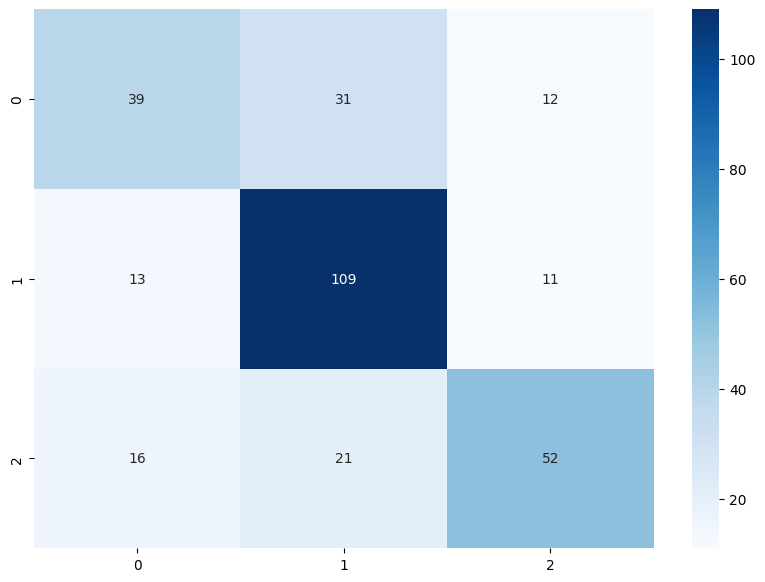

In [210]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(c_mat_final, annot=True,cmap="Blues",fmt='g')

In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_final1, target_names=["E","G","P"]))

              precision    recall  f1-score   support

           E       0.57      0.48      0.52        82
           G       0.68      0.82      0.74       133
           P       0.69      0.58      0.63        89

    accuracy                           0.66       304
   macro avg       0.65      0.63      0.63       304
weighted avg       0.65      0.66      0.65       304



### Features importances Modelo final 1

In [136]:
rand_forest_final1[-1].feature_importances_

array([9.14167176e-04, 4.08082251e-03, 4.81542197e-03, 1.17528631e-02,
       1.15211017e-02, 1.31236624e-02, 7.02825386e-03, 4.69055150e-04,
       6.24645609e-03, 1.80339833e-03, 7.80900933e-04, 4.93108085e-03,
       5.06535713e-03, 1.12456251e-02, 1.07902638e-02, 1.36525045e-02,
       6.21721023e-03, 1.69946921e-05, 8.12764223e-03, 2.62276847e-03,
       6.89397820e-02, 8.39074070e-02, 7.76941094e-02, 8.90512979e-02,
       7.44024418e-02, 9.95293343e-02, 7.93177845e-02, 8.64243771e-02,
       7.39030495e-02, 6.90272105e-02, 7.25976558e-02])

In [137]:
new_categorical_columns = rand_forest_final1.named_steps['prepo1'].transformers_[0][1].named_steps['onehot1'].get_feature_names_out(categorical_columns1)


In [223]:
import numpy as np
all_columns = np.concatenate((numerical_columns, new_categorical_columns))

feature_importance = list(zip(all_columns, rand_forest_final1[-1].feature_importances_))

df_feature_importance = pd.DataFrame(feature_importance, columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)
df_feature_importance = df_feature_importance.set_index('Feature')
df_feature_importance


,Importance
Feature,
alineacion_v_4-3-3,0.099529
alineacion_v_3-6-1,0.089051
alineacion_v_4-5-1,0.086424
alineacion_v_3-4-3,0.083907
alineacion_v_4-4-2,0.079318
alineacion_v_3-5-2,0.077694
alineacion_v_4-2-3-1,0.074402
alineacion_v_5-2-3,0.073903
alineacion_v_5-4-1,0.072598


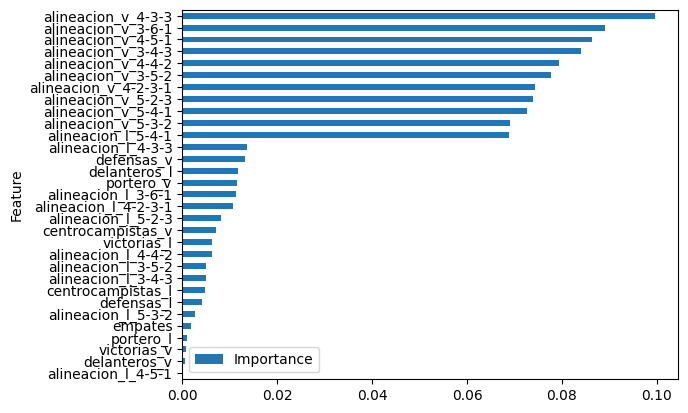

In [226]:
df_feature_importance.sort_values("Importance").plot.barh(y='Importance');

### Modelo sin las variables de alineacion

In [227]:
X_train_copia = X_train.copy()
X_test_copia = X_test.copy()
X_train_copia.drop(['alineacion_l','alineacion_v'],axis=1,inplace=True)
X_test_copia.drop(['alineacion_l','alineacion_v'],axis=1,inplace=True)

In [229]:
random_forest_final = RandomForestClassifier(max_depth=19, n_estimators=480)


In [230]:
random_forest_final.fit(X_train_copia,y_train)

RandomForestClassifier(max_depth=19, n_estimators=480)

In [233]:
y_predict_final2 = random_forest_final.predict(X_test_copia)

In [234]:
accuracy_score(y_predict_final2,y_test)

0.6611842105263158

### Matriz de confusion

In [240]:
from sklearn.metrics import confusion_matrix

c_mat_final2 = confusion_matrix(y_test,y_predict_final2)
c_mat_final2

c_mat_final2/c_mat_final2.sum(axis=1)

array([[0.48780488, 0.23308271, 0.12359551],
       [0.19512195, 0.81954887, 0.08988764],
       [0.18292683, 0.16541353, 0.58426966]])

<AxesSubplot: >

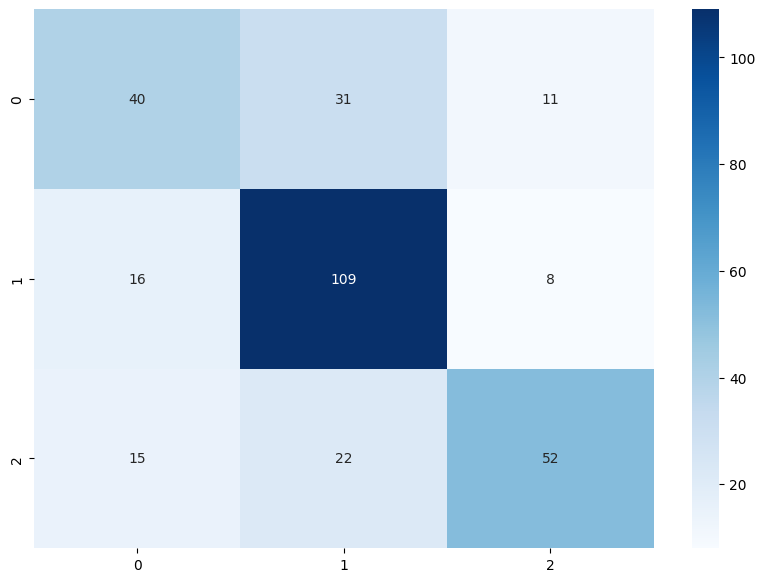

In [241]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(c_mat_final2, annot=True,cmap="Blues",fmt='g')

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_final2, target_names=["E","G","P"]))

              precision    recall  f1-score   support

           E       0.56      0.49      0.52        82
           G       0.67      0.82      0.74       133
           P       0.73      0.58      0.65        89

    accuracy                           0.66       304
   macro avg       0.66      0.63      0.64       304
weighted avg       0.66      0.66      0.65       304



### Features importances Modelo final 2

In [368]:
random_forest_final.feature_importances_

array([0.07342759, 0.10213184, 0.09453551, 0.10406104, 0.08556903,
       0.11615457, 0.09191977, 0.09735798, 0.08297393, 0.07647027,
       0.07539848])

In [244]:
fi_rnd= pd.DataFrame(random_forest_final.feature_importances_,
                         X_train_copia.columns, 
                          columns = ["Feature imp. RND"]).sort_values("Feature imp. RND", ascending=False)
fi_rnd

,Feature imp. RND
defensas_v,0.115806
delanteros_l,0.106218
defensas_l,0.098937
delanteros_v,0.098879
centrocampistas_v,0.092114
centrocampistas_l,0.088139
portero_v,0.082737
victorias_l,0.082684
victorias_v,0.081828
portero_l,0.077438


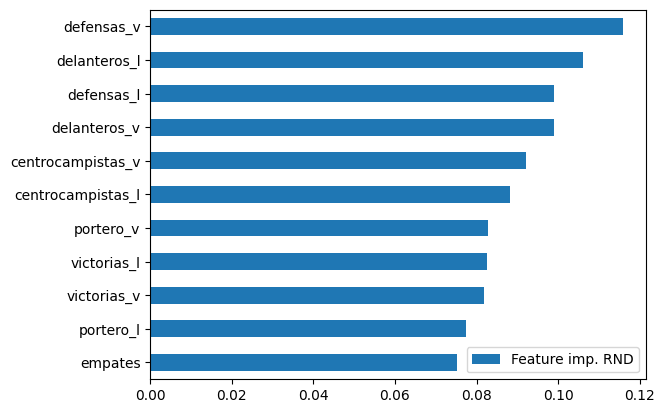

In [246]:
fi_rnd.sort_values("Feature imp. RND").plot.barh(y='Feature imp. RND');

In [248]:
! pip install shap

     -------------------------------------- 435.6/435.6 kB 3.0 MB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [286]:
import shap
# Carga el código de visualización Javascript en el notebook
shap.initjs()

In [287]:
# Creamos el explainer y calculamos los valores SHAP. TreeExplainer funciona con árboles y modelos lineales. Si usamos un modelo lineal, usamos LinearExplainer.
explainer = shap.TreeExplainer(random_forest_final)
shap_values = explainer.shap_values(X_train_copia)

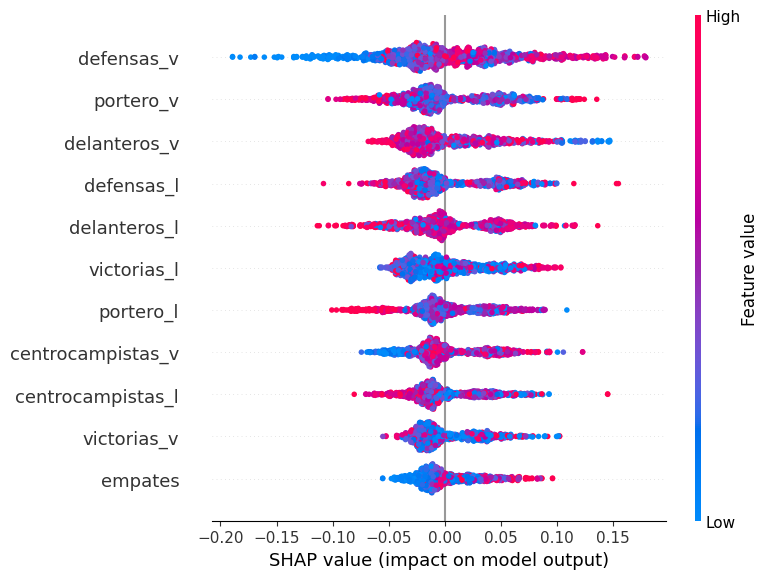

In [300]:
shap.summary_plot(shap_values[0], X_train_copia)

In [295]:
# from sklearn import set_config

# set_config(transform_output="default")

## Predicción con datos nuevos

In [305]:
X_test_predict = pd.read_csv('liga_22_23_para_predict.csv').round(2)
X_predict = X_test_predict.copy()
X_predict.drop(['Unnamed: 0','local','visitante'],axis=1,inplace=True)
y_test_predict = X_predict.pop('Resultado_l')


In [306]:
y_predict = rand_forest_final1.predict(X_predict)
y_test_predict_encode = le.transform(y_test_predict)
accuracy_score(y_predict,y_test_predict)

0.46956521739130436

In [307]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test_predict,y_predict)
c_mat

c_mat/c_mat.sum(axis=1)



array([[0.18867925, 0.375     , 0.05479452],
       [0.30188679, 0.67307692, 0.24657534],
       [0.1509434 , 0.35576923, 0.38356164]])

In [308]:
le.classes_

array(['E', 'G', 'P'], dtype=object)

<AxesSubplot: >

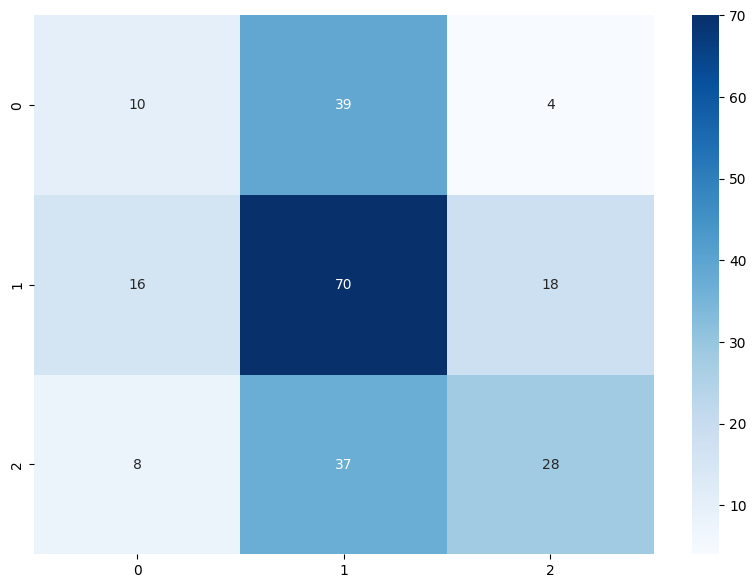

In [309]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(c_mat, annot=True,cmap="Blues")

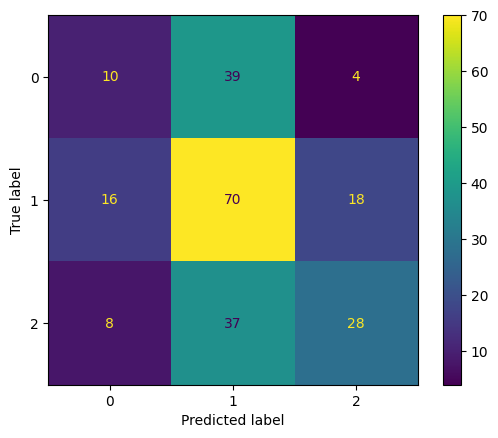

In [310]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat)
disp.plot();

In [311]:
from sklearn.metrics import classification_report
print(classification_report(y_test_predict, y_predict, target_names=["E","G","P"]))

              precision    recall  f1-score   support

           E       0.29      0.19      0.23        53
           G       0.48      0.67      0.56       104
           P       0.56      0.38      0.46        73

    accuracy                           0.47       230
   macro avg       0.44      0.42      0.42       230
weighted avg       0.46      0.47      0.45       230



In [52]:
X_test_predict.insert(8,'Prediccion_L',acur)

In [53]:
X_test_predict

,Unnamed: 0,portero_l,defensas_l,centrocampistas_l,delanteros_l,alineacion_l,local,Resultado_l,Prediccion_L,visitante,alineacion_v,portero_v,defensas_v,centrocampistas_v,delanteros_v,victorias_l,empates,victorias_v
0,0,72.500000,60.838750,62.547778,66.888889,4-2-3-1,OSASUNA,G,E,SEVILLA,4-2-3-1,73.000000,70.888889,72.791667,72.555556,31,26,49
1,1,78.833333,59.791667,68.055556,69.888889,4-4-2,CELTA,E,E,ESPANYOL,4-5-1,76.333333,62.302500,67.945000,62.083333,44,33,58
2,2,79.666667,63.921667,64.805556,68.222222,4-5-1,REAL VALLADOLID,P,E,VILLARREAL,4-3-3,76.833333,63.833333,69.222222,70.796667,11,6,13
3,3,86.333333,61.791667,65.666667,75.777778,4-3-3,BARCELONA,E,G,RAYO VALLECANO,4-2-3-1,70.500000,60.958333,70.194444,64.111111,27,8,6
4,4,72.500000,63.418056,65.833333,66.119444,4-4-2,CADIZ,P,P,R. SOCIEDAD,4-4-2,77.666667,62.000000,69.833333,68.916667,8,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,77.166667,70.105000,67.569444,66.166667,4-2-3-1,ATHLETIC,P,G,GIRONA,4-5-1,78.333333,51.590833,64.222222,60.166667,3,0,2
226,226,66.000000,59.791667,65.500000,70.000000,4-4-2,CELTA,G,E,REAL VALLADOLID,4-2-3-1,79.666667,64.885000,62.958333,65.083333,43,27,30
227,227,72.016204,54.021250,61.125000,66.000000,4-4-2,ALMERIA,G,P,BARCELONA,4-3-3,86.333333,64.333333,69.200000,73.833333,0,2,13
228,228,73.000000,66.750000,70.083333,66.611111,3-6-1,SEVILLA,P,G,OSASUNA,4-3-3,79.000000,58.741250,64.340833,60.833333,49,26,33
